### Initialize the raw data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score
from matplotlib import ticker
import pandas as pd


I = [a/10 for a in range(5,23)]
I_err = [0.01/2 for a in range(5,23)]
P_IR = [1,14,41,71,108,137,161,178,199,228,249,264,290,298,311,331,354,414]
P_IR_err = [1/2 for a in range(5,23)]
P_LD = [55,134,219,300,384,471,549,634,705,789,867,947,1021,1110,1181,1270,1334,1415]
P_LD_err = [1/2 for a in range(5,23)]

eta = [ P_IR[a]/P_LD[a] for a in range(23-5) ]
eta_err = [ eta[a]*np.sqrt((P_IR_err[a]/P_IR[a])**2 + (P_LD_err[a]/P_LD[a])**2) for a in range(23-5) ]


print(eta)
print(eta_err)

[0.01818181818181818, 0.1044776119402985, 0.1872146118721461, 0.23666666666666666, 0.28125, 0.2908704883227176, 0.29326047358834245, 0.2807570977917981, 0.2822695035460993, 0.2889733840304182, 0.28719723183391005, 0.2787750791974657, 0.2840352595494613, 0.26846846846846845, 0.26333615580016934, 0.2606299212598425, 0.2653673163418291, 0.29257950530035337]
[0.009092411596347152, 0.003751652883292334, 0.00232277107800127, 0.0017127066875360954, 0.0013526017365392792, 0.001105566897247775, 0.0009491020544947038, 0.0008191362704657802, 0.0007369323568978409, 0.0006596424326265059, 0.0006000138824571484, 0.00054811551936512, 0.0005090870167007901, 0.00046640121640922726, 0.0004378034880361642, 0.0004068527549568698, 0.00038778521268723927, 0.0003681705406387017]


### Ready to plot it!

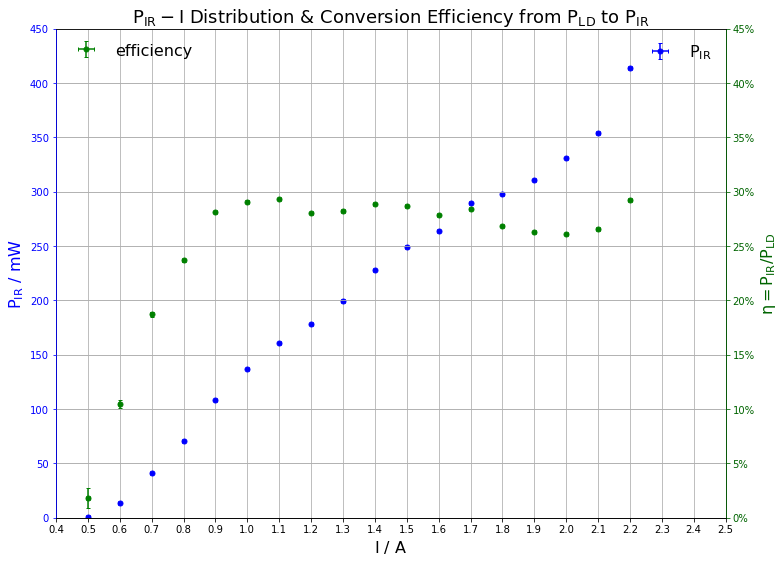

In [18]:
#plt.scatter(x, y, label='data')
fig=plt.figure(figsize=(12,9))

ax1 = fig.add_subplot(111)
ax1.errorbar(I, P_IR, xerr=I_err, yerr=P_IR_err ,fmt='o', label=r'$\rm P_{IR}$', color='blue', markersize=5, ecolor='blue', capsize=2)
ax1.legend(loc=1, frameon=False, fontsize=16)
ax1.set_ylabel(r'$\rm P_{IR}\ /\ mW$', fontsize=16, color="blue") 
ax1.set_xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
ax1.grid()
ax1.set_ylim(0,450)
#ax1.yaxis.label.set_color('red') 
ax1.tick_params(axis='y', colors='blue') 


ax2 = ax1.twinx()
ax2.errorbar(I, eta, xerr=I_err, yerr=eta_err,fmt='o', label='efficiency', color='green', markersize=5, ecolor='green', capsize=2)
ax2.legend(loc=2, frameon=False, fontsize=16)
ax2.set_ylim(0,0.45)
#ax2.set_xlim([0, np.e])
#ax2.set_xlabel('Same X for both exp(-x) and ln(x)')
ax2.set_ylabel(r'$\rm \eta = P_{IR}/P_{LD}$', fontsize=16, color="darkgreen")
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax2.tick_params(axis='y', colors='darkgreen') 

x_major_locator=MultipleLocator(0.1)
y1_major_locator=MultipleLocator(50)
y2_major_locator=MultipleLocator(0.05)

ax1.xaxis.set_major_locator(x_major_locator)
ax1.yaxis.set_major_locator(y1_major_locator)
ax2.yaxis.set_major_locator(y2_major_locator)

plt.title(r"$\rm P_{IR}-I$ Distribution & Conversion Efficiency from $\rm P_{LD}$ to $\rm P_{IR}$", fontsize=18)
#plt.xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
plt.grid(True)
#plt.legend(loc='best', frameon=False)
plt.xlim(0.4,2.5)
#plt.ylim(-5,110)
#plt.axis([30, 400, 100, 400])
#plt.plot(myline, mymodel(myline), color = 'green', linestyle='dashed', label='Linear Fit')
#plt.text(0.5, 1400,r"$y=%.5fx%.5f$"%(a1,a0), fontsize=16,color="green")
ax=plt.gca()
ax.spines['left'].set_color('blue')
ax.spines['right'].set_color('darkgreen')

plt.savefig('phyex3_fig.pdf')
plt.show()